In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import numpy as np

%matplotlib inline

# up figure resolution
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 150

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Statsmodels

In [2]:
ld_backup = pd.read_csv(f"http://data.insideairbnb.com/spain/catalonia/barcelona/2020-02-16/data/listings.csv.gz")
ld = ld_backup.copy()

# convert price dtype
ld['price'] = ld.price.str[1:].replace("$", '')
ld['price'] = ld.price.str.replace(',', '')
ld['price'] = ld.price.astype(float)

# log of price
ld['price_log'] = ld.price.apply(np.log)
ld['price_log'] = ld.price_log.replace([np.inf, -np.inf], np.nan)
ld['price_log'] = ld.price_log.fillna(value=0)

# calculcate deal index
ld['deal_index'] = ld.review_scores_rating / ld.price

# dropna
ld = ld.dropna(subset=['deal_index'])

for c in ld.columns:
    print(c)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [3]:
model_subset = ld[['bathrooms', 'bedrooms', 'room_type', 'property_type', 'square_feet', 'transit', 'neighbourhood', 'price']]
model_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15626 entries, 0 to 20880
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      15624 non-null  float64
 1   bedrooms       15615 non-null  float64
 2   room_type      15626 non-null  object 
 3   property_type  15626 non-null  object 
 4   square_feet    484 non-null    float64
 5   transit        10201 non-null  object 
 6   neighbourhood  15616 non-null  object 
 7   price          15626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.1+ MB


In [4]:
model_subset = model_subset.drop(columns=['square_feet'])
model_subset = model_subset.dropna()
model_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10187 entries, 0 to 20709
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      10187 non-null  float64
 1   bedrooms       10187 non-null  float64
 2   room_type      10187 non-null  object 
 3   property_type  10187 non-null  object 
 4   transit        10187 non-null  object 
 5   neighbourhood  10187 non-null  object 
 6   price          10187 non-null  float64
dtypes: float64(3), object(4)
memory usage: 636.7+ KB


In [9]:
mod = smf.ols(formula='price ~ bathrooms + bedrooms + C(property_type)', data=model_subset)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.29
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          3.83e-133
Time:                        17:24:28   Log-Likelihood:                -77225.
No. Observations:               10187   AIC:                         1.545e+05
Df Residuals:                   10160   BIC:                         1.547e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     49.3853    194.183      0.254      0.799    -331.251     430.022
C(property_type)[T.Apartment]                -22.9258    193.995     -0.118      0.906    -403.194     357.343
C(property_type)[T.Bed and breakfast]        -90.1572    204.078     -0.442      0.659    -490.190     309.875
C(property_type)[T.Boat]                      56.8794    215.992      0.263      0.792    -366.507     480.266
C(property_type)[T.Boutique hotel]           183.7659    204.847      0.897      0.370    -217.775     585.307
C(property_type)[T.Cabin]                    -89.4242    512.991     -0.174      0.862   -1094.988     916.140
C(property_type)[T.Camper/RV]                 76.8736    513.087      0.150      0.881    -928.878    1082.625
C(property_type)[T.Casa particular (Cuba)]   -44.1923    306.654     -0.144      0.885    -645.296     556.911
C(property_type)[T.Chalet]                   -83.4500    335.880     -0.248      0.804    -741.842     574.941
C(property_type)[T.Condominium]              -59.0941    196.514     -0.301      0.764    -444.299     326.111
C(property_type)[T.Dome house]               -87.0908    335.863     -0.259      0.795    -745.449     571.268
C(property_type)[T.Farm stay]                -59.4242    512.991     -0.116      0.908   -1064.988     946.140
C(property_type)[T.Guest suite]              -65.3816    201.287     -0.325      0.745    -459.944     329.181
C(property_type)[T.Guesthouse]               -85.9787    221.155     -0.389      0.697    -519.487     347.530
C(property_type)[T.Hostel]                    67.4719    202.386      0.333      0.739    -329.244     464.188
C(property_type)[T.Hotel]                    267.3206    227.373      1.176      0.240    -178.376     713.017
C(property_type)[T.House]                    -67.9833    197.183     -0.345      0.730    -454.502     318.535
C(property_type)[T.Island]                   -64.4242    512.991     -0.126      0.900   -1069.988     941.140
C(property_type)[T.Loft]                     -26.5485    196.034     -0.135      0.892    -410.813     357.716
C(property_type)[T.Nature lodge]            2586.1767    233.214     11.089      0.000    2129.031    3043.322
C(property_type)[T.Other]                    -57.7403    217.786     -0.265      0.791    -484.644     369.164
C(property_type)[T.Serviced apartment]        89.6097    196.107      0.457      0.648    -294.798     474.017
C(property_type)[T.Tiny house]               -13.4242    387.806     -0.035      0.972    -773.600     746.751
C(property_type)[T.Townhouse]                -34.8447    215.195     -0.162      0.871    -456.668     386.979
C(property_type)[T.Villa]                     16.7046    256.929      0.065      0.948

In [10]:
mod = smf.ols(formula='price ~ bathrooms + bedrooms + C(room_type)', data=model_subset)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     85.65
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           1.79e-88
Time:                        17:25:01   Log-Likelihood:                -77371.
No. Observations:               10187   AIC:                         1.548e+05
Df Residuals:                   10181   BIC:                         1.548e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      111.3325     14.863      7.491      0.000      82.198     140.467
C(room_type)[T.Hotel room]      38.9180     30.897      1.260      0.208     -21.646      99.482
C(room_type)[T.Private room]  -135.0960     11.617    -11.630      0.000    -157.867    -112.325
C(room_type)[T.Shared room]   -131.2618     60.010     -2.187      0.029    -248.893     -13.630
bathrooms                       32.3017      8.591      3.760      0.000      15.463      49.141
bedrooms                        32.2570      6.514      4.952      0.000      19.488      45.026
==============================================================================
Omnibus:                    17723.380   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17184512.093
Skew:                          12.355   Prob(JB):                         0.00
Kurtosis:                     202.688   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
model_subset.corr()

,bathrooms,bedrooms,price
bathrooms,1.000000,0.501504,0.098441
bedrooms,0.501504,1.000000,0.161081
price,0.098441,0.161081,1.000000


## Sklearn

In [54]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
columns = ld[['bathrooms', 'bedrooms', 'room_type', 'property_type', 'neighbourhood', 'zipcode', 'price']]
columns = columns.dropna()
X = columns.drop(columns=['price'])
y = columns.price

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15176 entries, 0 to 20880
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      15176 non-null  float64
 1   bedrooms       15176 non-null  float64
 2   room_type      15176 non-null  object 
 3   property_type  15176 non-null  object 
 4   neighbourhood  15176 non-null  object 
 5   zipcode        15176 non-null  object 
dtypes: float64(2), object(4)
memory usage: 829.9+ KB


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15176 entries, 0 to 20880
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      15176 non-null  float64
 1   bedrooms       15176 non-null  float64
 2   room_type      15176 non-null  object 
 3   property_type  15176 non-null  object 
 4   neighbourhood  15176 non-null  object 
 5   zipcode        15176 non-null  object 
dtypes: float64(2), object(4)
memory usage: 829.9+ KB


In [57]:
#dummify
categorical_columns = ['room_type', 'property_type', 'neighbourhood', 'zipcode']
dummies = pd.get_dummies(X[categorical_columns])
X = pd.concat([X, dummies], axis=1)
X = X.drop(columns=categorical_columns)

In [65]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y_pred = cross_val_predict(lr, X, y, cv=10)

In [66]:
error = np.abs(y_pred - y)

In [72]:
y.mean()

133.56338956246705

In [71]:
error.mean()

1070375239749.3774

---

In [75]:
lr = linear_model.LinearRegression()
columns = ld[['bathrooms', 'bedrooms', 'price']]
columns = columns.dropna()
X = columns.drop(columns=['price'])
y = columns.price

In [78]:
y_pred = cross_val_predict(lr, X, y, cv=10)

In [81]:
y_pred.mean()

132.4010156283342

In [80]:
y.mean()

132.27669249983987

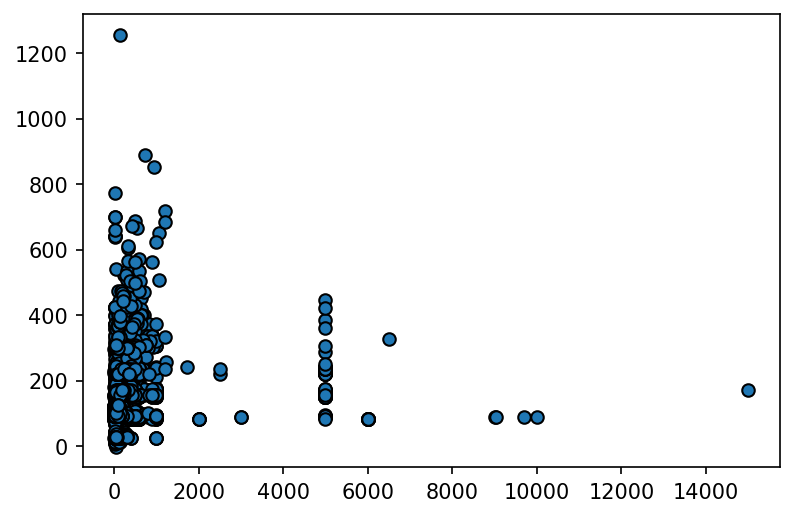

In [83]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))

---

In [84]:
lr = linear_model.LinearRegression()
columns = ld[['bathrooms', 'bedrooms', 'price']]
columns = columns.dropna()
columns = columns[columns.price < 4000]
X = columns.drop(columns=['price'])
y = columns.price

In [85]:
y_pred = cross_val_predict(lr, X, y, cv=10)

In [88]:
mae = np.abs(y_pred - y)

In [89]:
mae.describe()

count    15513.000000
mean        56.742041
std        103.654727
min          0.014558
25%         20.177870
50%         35.177870
75%         55.109722
max       2933.175476
Name: price, dtype: float64

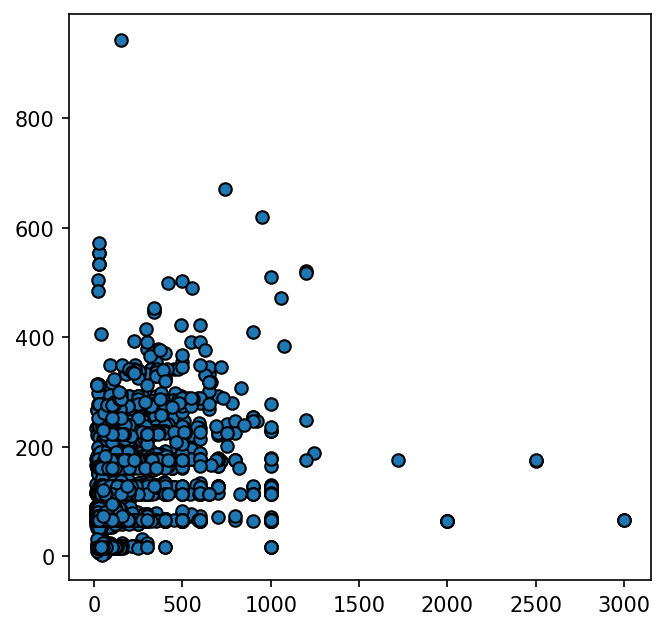

In [87]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))

---

In [121]:
lr = linear_model.LinearRegression()
data = ld[['bathrooms', 'bedrooms', 'price', 'accommodates', 'neighbourhood_group_cleansed']]
data = data.dropna()
data = data[data.price < 4000]

#dummify
categorical_columns = ['neighbourhood_group_cleansed']
dummies = pd.get_dummies(data[categorical_columns])
data = pd.concat([data, dummies], axis=1)
data = data.drop(columns=categorical_columns)

X = data.drop(columns=['price'])
y = data.price

y_pred = cross_val_predict(lr, X, y, cv=10)
mae = np.abs(y_pred - y)
mae.describe()

count    15513.000000
mean        51.556317
std        103.026461
min          0.000000
25%         13.531250
50%         28.109375
75%         52.843750
max       2953.835938
Name: price, dtype: float64

Text(0.5, 0, 'measured')

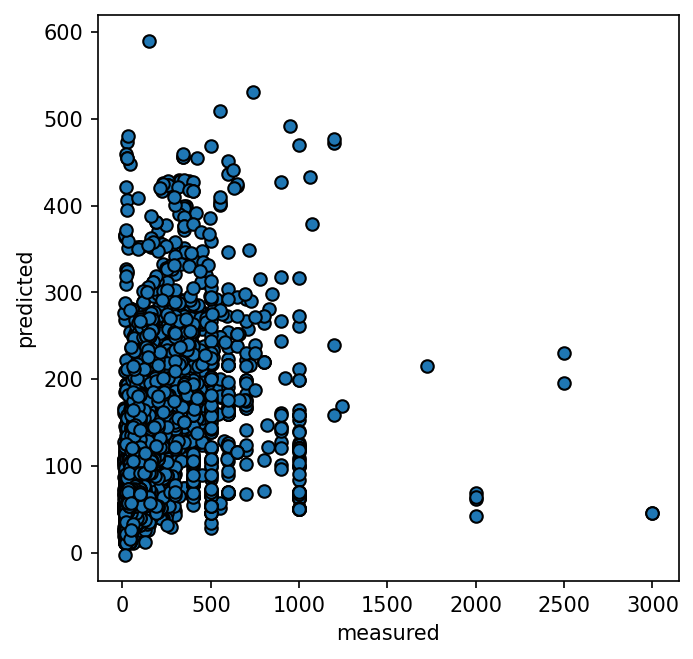

In [122]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.set_ylabel('predicted')
ax.set_xlabel('measured')

---

In [123]:
ld.head().T

,0,1,2,3,4
id,18674,23197,25786,31958,32471
listing_url,https://www.airbnb.com/rooms/18674,https://www.airbnb.com/rooms/23197,https://www.airbnb.com/rooms/25786,https://www.airbnb.com/rooms/31958,https://www.airbnb.com/rooms/32471
scrape_id,20200216165356,20200216165356,20200216165356,20200216165356,20200216165356
last_scraped,2020-02-16,2020-02-16,2020-02-16,2020-02-16,2020-02-16
name,Huge flat for 8 people close to Sagrada Familia,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,"Gaudi Attic 1, Friendly Rentals","Gaudi Attic 2, Friendly Rentals"
summary,110m2 apartment to rent in Barcelona. Located ...,I do not accept groups of young people under 2...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,"This apartment has: 1 double bed, 1 double sof...","Diese Wohnung verfügt über: 2 Doppelbetten, 1 ..."
space,Apartment with 110 m2 located in the 6th floor...,Elegant spacious apartment suitable for 6. Amp...,Room available for rent.- PEDRO PEREZ. Share...,"This apartment has: 1 double bed, 1 double sof...","Diese Wohnung verfügt über: 2 Doppelbetten, 1 ..."
description,110m2 apartment to rent in Barcelona. Located ...,I do not accept groups of young people under 2...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,"This apartment has: 1 double bed, 1 double sof...","Diese Wohnung verfügt über: 2 Doppelbetten, 1 ..."
experiences_offered,none,none,none,none,none
neighborhood_overview,Apartment in Barcelona located in the heart of...,Strategically located in the area of Parc del ...,Solo decir que a menudo ni salgo del barrio. M...,"Looking for apartments in Gràcia, Barcelona fo...","Looking for apartments in Gràcia, Barcelona fo..."


---

In [136]:
lr = linear_model.LinearRegression()

data = ld.copy()

# filters
data = data[data.price < 4000]
data = data[data.property_type == 'Apartment']

# select columns to model
data = data[['bathrooms', 'bedrooms', 'price', 'accommodates', 'neighbourhood_group_cleansed', 'beds']]
data = data.dropna()

#dummify
categorical_columns = ['neighbourhood_group_cleansed']
dummies = pd.get_dummies(data[categorical_columns])
data = pd.concat([data, dummies], axis=1)
data = data.drop(columns=categorical_columns)


X = data.drop(columns=['price'])
y = data.price

y_pred = cross_val_predict(lr, X, y, cv=10)

mae = np.abs(y_pred - y)

mae.describe()

count    13366.000000
mean        43.962968
std         85.228381
min          0.000000
25%         10.540039
50%         24.000000
75%         49.593750
max       2965.625000
Name: price, dtype: float64

Text(0.5, 0, 'measured')

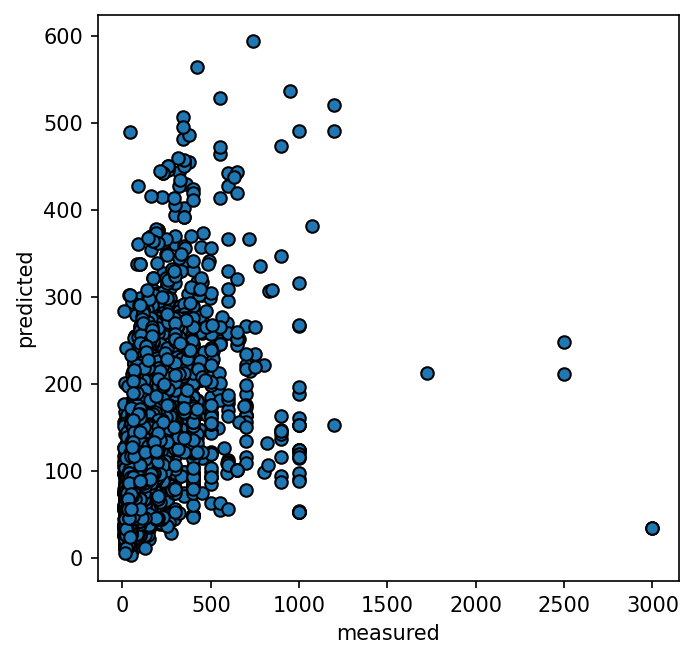

In [137]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.set_ylabel('predicted')
ax.set_xlabel('measured')

---

In [115]:
lr = linear_model.LinearRegression()
data = ld[['bathrooms', 'bedrooms', 'price', 'accommodates', 'neighbourhood_group_cleansed', 'zipcode']]
data = data.dropna()
data = data[data.price < 4000]

#dummify
categorical_columns = ['neighbourhood_group_cleansed', 'zipcode']
dummies = pd.get_dummies(data[categorical_columns])
data = pd.concat([data, dummies], axis=1)
data = data.drop(columns=categorical_columns)

X = data.drop(columns=['price'])
y = data.price

In [116]:
y_pred = cross_val_predict(lr, X, y, cv=10)

In [117]:
mae = np.abs(y_pred - y)

In [118]:
mae.describe()

count    1.508700e+04
mean     1.142484e+08
std      3.041422e+09
min      3.417969e-03
25%      1.166992e+01
50%      2.677344e+01
75%      5.631445e+01
max      1.661955e+11
Name: price, dtype: float64

Text(0.5, 0, 'measured')

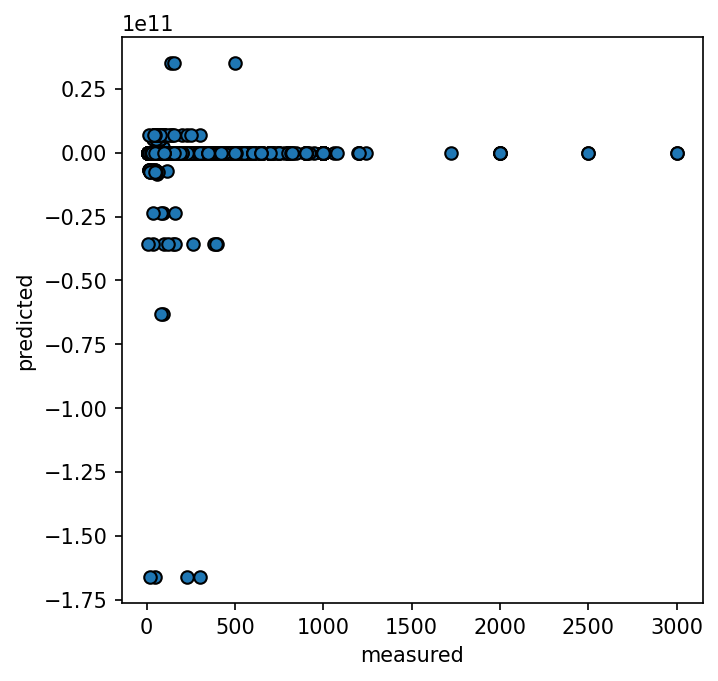

In [119]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.set_ylabel('predicted')
ax.set_xlabel('measured')